In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
breast_cancer = pd.read_csv('breast-cancer.csv', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer.columns = total_cols

In [4]:
breast_cancer.head(5)

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [5]:
# breast_cancer.dtypes

In [6]:
numerics = breast_cancer._get_numeric_data()

In [7]:
numerics.head(5)

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [8]:
numerics = numerics.drop(['id','time'], axis=1)

Before we apply PCA we need to standardize/scale the data. For this we can use sklearn's preprocessing library 


In [9]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerics)
scaled = transformer.transform(numerics)
scaled = pd.DataFrame(scaled)
scaled.columns = numerics.columns 
scaled.head()

,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,cell_1_symmetry,cell_1_fractal_dimension,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,0.086480,...,1.156324,-0.022477,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530
1,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,2.216313,...,-2.133937,1.535510,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903
2,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,-0.360812,...,-1.525864,0.650684,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753
3,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,4.810056,...,-0.606256,-1.439240,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410
4,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,-0.536682,...,-2.243890,0.411261,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560


In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pca.fit(scaled)

PCA()

In [11]:
# pca.components_

In [12]:
# variations = pca.explained_variance_
variations = pca.explained_variance_ratio_*100
variations = np.round(variations, decimals=1)
variations

array([31.6, 26.5, 10.8,  7.2,  4.6,  4. ,  3.2,  2.9,  1.9,  1.5,  1.2,
        1.1,  0.8,  0.7,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0.1,  0.1,
        0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [13]:
plot_labels = ['PC'+str(i) for i in range(1,len(variations)+1)]
?plot_labels

Type:        list
String form: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', ' <...> , 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31']
Length:      31
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

Text(0.5, 1.0, 'PCA Scree Plot')

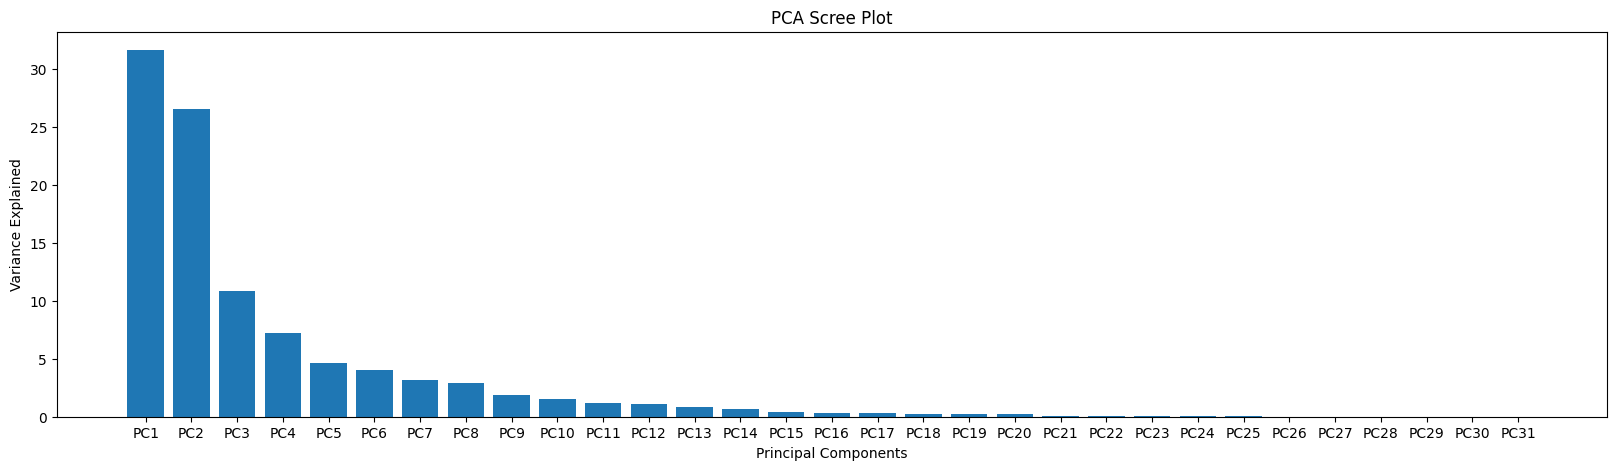

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.bar(x = plot_labels, height=variations)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')

In [15]:
data = pd.DataFrame(pca.components_)
data = data[[0,1,2]]
data.columns = ['PC1', 'PC2', 'PC3']
data.head()

,PC1,PC2,PC3
0,0.212947,0.017315,0.229033
1,-0.235699,-0.058704,-0.217823
2,-0.085063,0.063490,-0.085697
3,0.012836,0.601037,0.017419
4,0.049309,0.119550,0.037690
